# Homework 6
### CSCE 633
### Arya Rahmanian
### Summer 2024

### Part A - Feature Selection

#### Imports

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

#### A) Load Data

In [3]:
iris = load_iris()

#### B) Data Exploration

In [4]:
feature_names = iris.feature_names
target_names = iris.target_names

In [5]:
print(feature_names)
print(target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


#### Feature Comparison

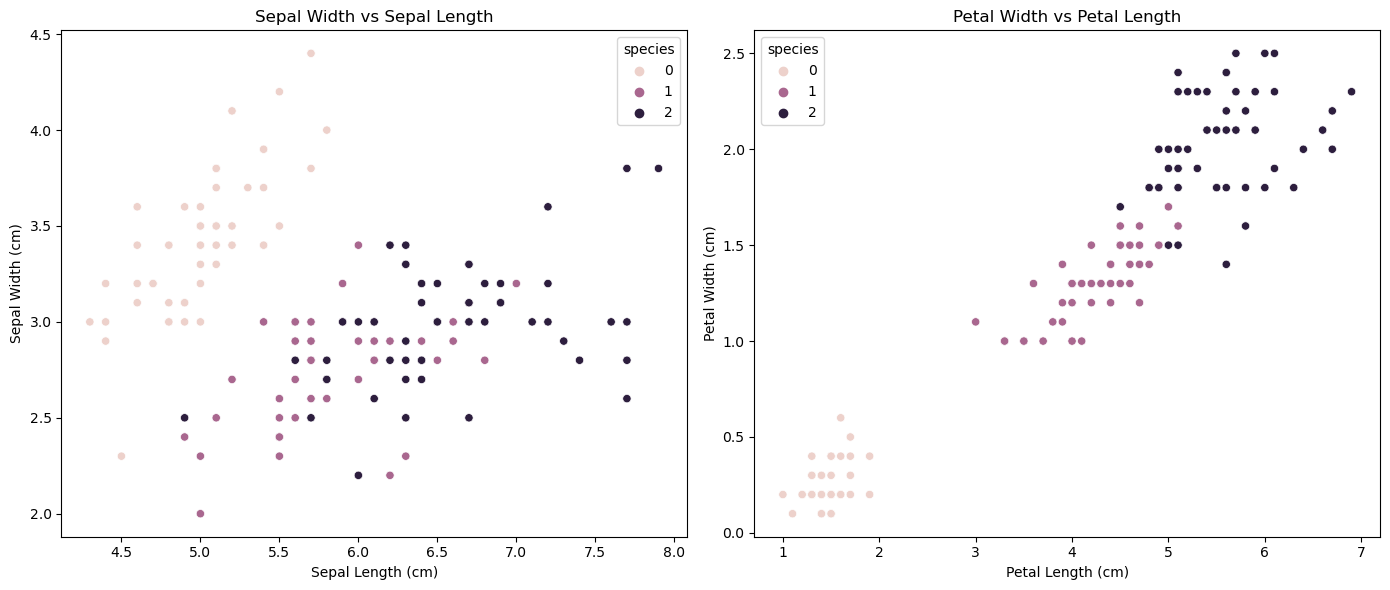

In [6]:
df = pd.DataFrame(data=iris.data, columns=feature_names)
df['species'] = iris.target

#sepal width and length plot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df['species'])
plt.title('Sepal Width vs Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

#  petal width and length plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], hue=df['species'])
plt.title('Petal Width vs Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.tight_layout()
plt.show()

### Part B - Feature Extraction

#### Imports

In [15]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

#### 1) Applying PCA to Dataset

In [8]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(iris.data)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['species'] = iris.target

pca_df.head()

,PC1,PC2,PC3,species
0,-2.684126,0.319397,-0.027915,0
1,-2.714142,-0.177001,-0.210464,0
2,-2.888991,-0.144949,0.017900,0
3,-2.745343,-0.318299,0.031559,0
4,-2.728717,0.326755,0.090079,0


Explained variances: [4.22824171 0.24267075 0.0782095 ]
Explained variance ratios: [0.92461872 0.05306648 0.01710261]


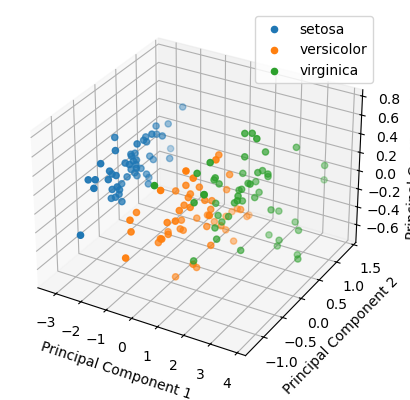

In [12]:
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

print(f'Explained variances: {explained_variance}')
print(f'Explained variance ratios: {explained_variance_ratio}')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(species)):
    indices = pca_df['species'] == i
    ax.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], pca_df.loc[indices, 'PC3'],
                label=target_names[i])

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()

### Glove

#### Load Data

In [13]:
def loadGlove(glove_file):
    glove_dict = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            glove_dict[word] = vector
    return glove_dict

In [18]:
glove_file = 'glove.6B.200d.txt'
glove_embeddings = loadGlove(glove_file)

In [19]:
# Accessing the word man and woman vecttor
print(f"Vector for 'man': {glove_embeddings['man']}")

print(f"Vector for 'woman': {glove_embeddings['woman']}")

Vector for 'man': [ 1.0627e-01 -5.8248e-01 -2.7217e-01 -2.6772e-01 -1.1844e-01 -1.3373e-03
 -1.8707e-01  1.5110e-01  2.0336e-01 -5.0561e-01 -5.6029e-02 -1.4278e-01
  2.7876e-01  5.6570e-01  1.0539e-01  2.0012e-01 -1.0245e-01  3.8694e-01
  4.9881e-03 -2.0792e-01  4.3314e-01  2.7799e+00 -3.7724e-03 -1.5376e-01
  3.5440e-03 -3.2788e-01 -2.2937e-01 -3.2938e-01  1.0435e-01  1.8370e-01
 -2.0869e-01 -1.2898e-01  1.9762e-01  5.7719e-01  4.8807e-01 -2.2012e-01
 -7.8150e-01 -2.6464e-01 -4.6928e-01  4.8230e-01 -7.2708e-01  1.7301e-02
 -3.5347e-01  1.6986e-01 -4.0509e-01  3.1622e-02 -8.5332e-02  1.1077e-01
  2.3554e-01 -1.8391e-01  2.3047e-01  5.0146e-01  1.8733e-01  3.3038e-01
  3.8698e-01 -1.6126e-01 -1.2255e-01 -6.4396e-02  5.2114e-01 -1.9056e-01
 -2.9464e-01 -2.8260e-01 -8.4987e-01  2.0800e-01 -4.2650e-02 -3.0999e-01
  4.5363e-01  3.4151e-01 -6.6935e-03  6.2788e-02  4.3688e-02 -3.1161e-01
 -1.7607e-01  6.5094e-01 -5.8473e-01 -3.6569e-01 -3.4423e-01 -4.3389e-01
  6.5343e-02 -1.2442e-01  1.7572e

### Pick Data

In [25]:
print("First 10 words:", list(glove_embeddings.keys())[:10])
print("Total number of words:", len(glove_embeddings))

First 10 words: ['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s"]
Total number of words: 400000


After saving all the words to a text file and examining them, I chose several words that corellate with politics and government. Here they are below

government, president, state, national, country, united, u.s. , china, american, minister, international, officials, military, security, public, political, economic, chief, washington, trade, army, federal, capital, country

##### PCA on Chosen Words

In [48]:
chosen_words = [
    'government', 'president', 'state', 'national', 'country', 'united', 'u.s.',
    'china', 'american', 'international', 'officials', 'military',
    'security', 'public', 'political', 'economic', 'chief', 'washington', 'trade',
     'federal', 'capital', 'country'
]

word_vectors = np.array([glove_embeddings[word] for word in chosen_words if word in glove_embeddings])

#### Apply PCA on chosen word

In [60]:
pca = PCA(n_components=10)
principal_components10 = pca.fit_transform(word_vectors)

explained_variance_ratio10 = pca.explained_variance_ratio_
print(f'Explained variance ratios: {explained_variance_ratio10}')
print(f'Cumulative explained variance: {np.cumsum(explained_variance_ratio10)}')

Explained variance ratios: [0.12078252 0.10686114 0.09125505 0.07674003 0.07097265 0.06715128
 0.06335098 0.05818847 0.04823769 0.04602276]
Cumulative explained variance: [0.12078252 0.22764367 0.31889874 0.39563876 0.46661142 0.5337627
 0.59711367 0.65530217 0.70353985 0.7495626 ]


In [55]:
pca = PCA(n_components=15)
principal_components = pca.fit_transform(word_vectors)
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained variance ratios: {explained_variance_ratio}')
print(f'Cumulative explained variance: {np.cumsum(explained_variance_ratio)}')


Explained variance ratios: [0.12078252 0.10686114 0.09125505 0.07674003 0.07097265 0.06715128
 0.06335098 0.05818847 0.04823769 0.04602276 0.03985696 0.03612643
 0.03439338 0.02731536 0.02436437]
Cumulative explained variance: [0.12078252 0.22764367 0.31889874 0.39563876 0.46661142 0.5337627
 0.59711367 0.65530217 0.70353985 0.7495626  0.7894196  0.825546
 0.8599394  0.8872548  0.9116191 ]


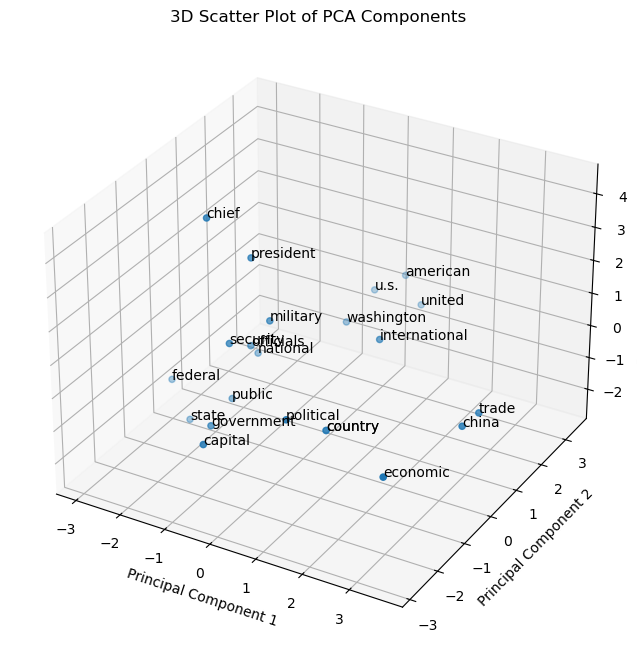

In [43]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract the first three principal components
pc1 = principal_components[:, 0]
pc2 = principal_components[:, 1]
pc3 = principal_components[:, 2]

# Scatter plot
ax.scatter(pc1, pc2, pc3)

# Annotate the points with their corresponding words
for i, word in enumerate(chosen_words):
    ax.text(pc1[i], pc2[i], pc3[i], word)

# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of PCA Components')

plt.show()